# Bài tập 2 - Genetic Algorithms
# **Yêu cầu cụ thể như sau**
## Lập trình GA phiên bản tiêu chuẩn:
 - Sử dụng Chọn lọc theo tỷ lệ (Proportional Selection).
 - Quy trình: Từ quần thể hiện tại (Population) có N cá thể, chọn lọc ra tập chọn lọc (Selection set) có N cá thể. Sử dụng N cá thể trong tập chọn lọc, bắt cặp để lai ghép (1X hoặc UX) và tạo ra N cá thể con cái mới (Offspring). N cá thể con cái mới sẽ thay thế toàn bộ các cá thể cha mẹ để tạo thành quần thể mới cho thế hệ tiếp theo.

## Lập trình GA phiên bản POPOP:
 - Sử dụng Chọn lọc giao đấu (Tournament Selection) với kích thước bảng đấu (tournament size) là 4.
 - Quy trình: Từ quần thể hiện tại (Population) có N cá thể, ta bắt cặp để thực hiện lai ghép (1X hoặc UX) để tạo ra N cá thể con cái mới (Offspring). Trộn các cá thể cha mẹ và con cái thành (P+O) có 2N cá thể, để từ đó tiến hành chọn lọc ra N cá thể cho thế hệ tiếp theo (Population).

## Trong cả 2 phiên bản, ta **chỉ cần Lai ghép** (crossover) chứ không cần cài đặt Đột biến.
Các bạn hãy thực nghiệm với 2 phiên bản trên để giải Bài toán OneMax trong 2 trường hợp: **50 bit** và **100 bit**, và Bài toán Leading Ones trong 2 trường hợp: **10 bit** và **20 bit**.

# **Với mỗi trường hợp, các bạn cần thử nghiệm như sau:**
 - Trường hợp 50 bit (OneMax) và 10 bit (Leading Ones), số lần gọi hàm lượng giá tối đa (max_evaluations) là 50.000 lần. Trường hợp 100 bit (OneMax) và 20 bit (Leading Ones), số lần gọi hàm lượng giá tối đa (max_evaluations) là 100.000 lần. Khi nào sử dụng hết số lần gọi hàm lượng giá thì thuật toán dừng lại.
 - Trường hợp 50 bit (OneMax) và 10 bit (Leading Ones), kích thước quần thể (population size) là 16. Trường hợp 100 bit (OneMax) và 20 bit (Leading Ones), kích thước quần thể (population size) là 64.
 - Với mỗi trường hợp cần thử nghiệm phép lai ghép một điểm (1X) và lai ghép đồng nhất (UX) để khảo sát xem: **Phép lai ghép nào (1X hay UX) là phù hợp với bài toán OneMax hơn? Với bài toán Leading Ones?**
 - Dựa vào kết quả thực nghiệm thì **GA phiên bản gốc hay GA phiên bản POPOP đạt hiệu năng cao hơn trên bài toán OneMax hơn? trên Leading Ones?**
 - Với mỗi thực nghiệm ta cần chạy ít nhất là 10 lần (n_trials = 10).

# **Trong bài nộp cần câu trả lời cho 4 câu hỏi trên, đồng thời có đầy đủ các đồ thị kết quả thực nghiệm như sau:**

 1. 01 đồ thị chứa kết quả trường hợp 50-bit OneMax của: GA gốc/1X, GA gốc/UX, POPOP/1X, và POPOP/UX.
 2. 01 đồ thị chứa kết quả trường hợp 100-bit OneMax của: GA gốc/1X, GA gốc/UX, POPOP/1X và POPOP/UX
 3. 01 đồ thị chứa kết quả trường hợp 10-bit Leading Ones của: GA gốc/1X, GA gốc/UX, POPOP/1X, và POPOP/UX.
 4. 01 đồ thị chứa kết quả trường hợp 20-bit Leading Ones của: GA gốc/1X, GA gốc/UX, POPOP/1X, và POPOP/UX.


In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
def initialize_population( num_individuals, num_variables ):
    """
    Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.

    Arguments:
    num_individuals -- Số lượng cá thể
    num_variables -- Số lượng biến

    Returns:
    pop -- Ma trận (num_individuals, num_variables ) chứa quần thể mới được khởi tạo ngẫu nhiên.
    """

    pop = np.random.randint(2, size=(num_individuals, num_variables))


    return pop

In [4]:
def onemax( ind ):
    """
    Hàm đánh giá OneMax: Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).

    Arguments:
    ind -- Cá thể cần được đánh giá.

    Returns:
    value -- Giá trị của cá thể ind.
    """

    value = np.sum(ind)

    return value

In [5]:
def leading_ones(ind):
  f = 0
  for i in range(len(ind)):
    if not ind[i]:
      f = i
      break
  return f

In [6]:
def truncation_selection(pop_fitness, selection_size):
    selected_indices = np.argsort(pop_fitness)[-selection_size:]
    return selected_indices

In [24]:
def proportional_selection(pop_fitness, selection_size):
  indexs = [idx for idx in range(0, len(pop_fitness))]
  sum_fitness = np.sum(pop_fitness)
  probabilities = [fitness/sum_fitness for fitness in pop_fitness]
  selected_indices = random.choices(indexs, probabilities, k=selection_size)
  return selected_indices

In [23]:
def tournament_selection(pop_fitness, selection_size, tournament_size = 4):
  selected_indices = []
  shuffle_index = [idx for idx in range(0, len(pop_fitness))] # init array index [0, 1, 2, ..., populatation_size]
  while len(selected_indices) < selection_size:
    group_tables = [shuffle_index[i:i+tournament_size] for i in range(0, len(shuffle_index), tournament_size)] # grouping with tournament_size
    for table in group_tables:
      index_max_fit = 0
      for idx in table:
        if pop_fitness[idx] > pop_fitness[index_max_fit]:
            index_max_fit = idx
      selected_indices.append(index_max_fit)
    np.random.shuffle(shuffle_index) # shuffle array index
  return selected_indices[0: selection_size]

In [22]:
def onePointCrossover(individual1, individual2):
  size = len(individual1)
  cut_index = int(np.random.rand()*(size -1))
  #cut_index = individual1.index(0)
  offspring1 = list(individual1)
  offspring2 = list(individual2)
  for idx in range(0, size):
    if idx < cut_index:
      temp = offspring2[idx]
      offspring2[idx] = offspring1[idx]
      offspring1[idx] = temp
  return offspring1, offspring2

In [10]:
def uniformCrossover(individual1, individual2):
  size = len(individual1)
  offspring1 = list(individual1)
  offspring2 = list(individual2)
  for idx in range(0, size):
    r = np.random.rand()
    if r < 0.5:
      temp = offspring2[idx]
      offspring2[idx] = offspring1[idx]
      offspring1[idx] = temp
  return offspring1, offspring2

In [11]:
def crossover(pop, crossAlg):
    """
    Hàm biến đổi tạo ra các cá thể con.

    Arguments:
    pop -- Quàn thể hiện tại.
    crossAlg -- thuật toán lai ghép

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """

    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []

    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1, offspring2 = crossAlg(list(pop[idx1]), list(pop[idx2]))

        offspring.append(offspring1)
        offspring.append(offspring2)

    offspring = np.array(offspring)
    return offspring

In [28]:
def genetic_algorithm_original(objective, num_individuals, num_parameters, max_evaluations, selectionAlg, crossAlg, verbose=False):
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = np.array([objective(ind) for ind in pop])
    num_evaluations = num_individuals
    mean_fitness = []
    if verbose:
        print("#Gen 0:")
        print(pop_fitness)

    while num_evaluations < max_evaluations:
        mean_fitness.append([num_evaluations, np.mean(pop_fitness)])
        selected_indices = selectionAlg(pop_fitness, num_individuals)
        selection_set = pop[selected_indices]
        selection_fitness = pop_fitness[selected_indices]

        offspring = crossover(selection_set, crossAlg)
        offspring_fitness = np.array([objective(ind) for ind in offspring])
        num_evaluations += len(offspring)

        pop = np.vstack([selection_set, offspring])
        pop_fitness = np.concatenate((selection_fitness, offspring_fitness))

        # if verbose:
        #     print(f'#Gen {i+1}:')
        #     print(pop_fitness)

    mean_fitness.append([num_evaluations, np.mean(pop_fitness)])
    if verbose:
        print('#Final result:')
        print(pop)
        print(pop_fitness)

    return (pop, pop_fitness, mean_fitness)


In [29]:
def genetic_algorithm_POPOP(objective, num_individuals, num_parameters, max_evaluations, selectionAlg, crossAlg, verbose=False):
  pop = initialize_population(num_individuals, num_parameters)
  pop_fitness = np.array([objective(ind) for ind in pop])
  num_evaluations = num_individuals
  mean_fitness = []
  while num_evaluations < max_evaluations:
    mean_fitness.append([num_evaluations, np.mean(pop_fitness)])

    # lai ghép các cá thể cha mẹ để tạo ra cá thể mới
    offspring = crossover(pop, crossAlg)
    offspring_fitness = np.array([objective(ind) for ind in offspring])
    num_evaluations += len(offspring)

    # ghép các cá thể cha mẹ với các cá thể vừa lai ghép có được
    popop = np.vstack([pop, offspring]) # 2N cá thể
    popop_fitness = np.concatenate((pop_fitness, offspring_fitness))

    # chọn lọc N cá thể từ quần thể popop 2N cá thể
    selected_indices = selectionAlg(popop_fitness, num_individuals)
    pop = popop[selected_indices]
    pop_fitness = popop_fitness[selected_indices]

  mean_fitness.append([num_evaluations, np.mean(pop_fitness)])
  return (pop, pop_fitness, mean_fitness)

In [14]:
n_trials = 10

# 1. Bài toán 50-bit One-max, kích thướt quần thể (population size): 16, số lần gọi hàm đánh giá tối đa (Max Evaluations): 50,000

In [30]:
#
num_parameters = 50
num_individuals = 16
max_evaluations = 50000

In [32]:
fits_origial_1x = []
fits_origial_ux = []
fits_popop_1x = []
fits_popop_ux = []
evals = []
for i in range(n_trials):
    pop_original_1x, pop_fitness_original_1x, mean_fitness_original_1x = genetic_algorithm_original(onemax, num_individuals, num_parameters, max_evaluations, selectionAlg= proportional_selection, crossAlg= onePointCrossover)
    pop_original_ux, pop_fitness_original_ux, mean_fitness_original_ux = genetic_algorithm_original(onemax, num_individuals, num_parameters, max_evaluations, selectionAlg= proportional_selection, crossAlg= uniformCrossover)
    pop_popop_1x, pop_fitness_popop_1x, mean_fitness_popop_1x = genetic_algorithm_POPOP(onemax, num_individuals, num_parameters, max_evaluations, selectionAlg= tournament_selection, crossAlg= onePointCrossover)
    pop_popop_ux, pop_fitness_popop_ux, mean_fitness_popop_ux = genetic_algorithm_POPOP(onemax, num_individuals, num_parameters, max_evaluations, selectionAlg= tournament_selection, crossAlg= uniformCrossover)

    mean_fitness_original_1x = np.array(mean_fitness_original_1x)
    mean_fitness_original_ux = np.array(mean_fitness_original_ux)
    mean_fitness_popop_1x = np.array(mean_fitness_popop_1x)
    mean_fitness_popop_ux = np.array(mean_fitness_popop_ux)
    if i == 0:
        evals = mean_fitness_original_1x[:,0]

    fits_origial_1x.append(mean_fitness_original_1x[:,1])
    fits_origial_ux.append(mean_fitness_original_ux[:,1])
    fits_popop_1x.append(mean_fitness_popop_1x[:,1])
    fits_popop_ux.append(mean_fitness_popop_ux[:,1])

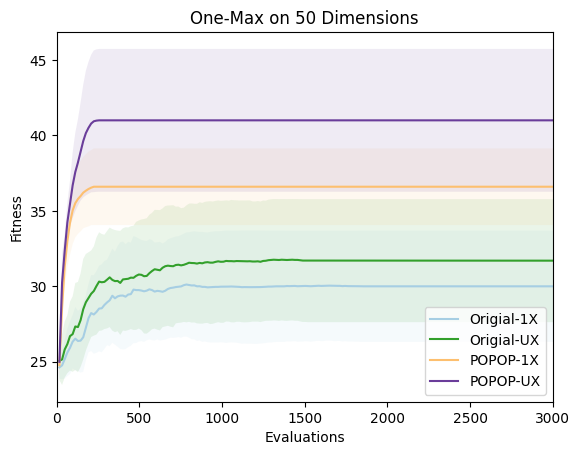

In [35]:
fits_origial_1x = np.array(fits_origial_1x)
avg_origial_1x = np.mean(fits_origial_1x, axis=0)
err_origial_1x = np.std(fits_origial_1x, axis=0)

fits_origial_ux = np.array(fits_origial_ux)
avg_origial_ux = np.mean(fits_origial_ux, axis=0)
err_origial_ux = np.std(fits_origial_ux, axis=0)

fits_popop_1x = np.array(fits_popop_1x)
avg_popop_1x = np.mean(fits_popop_1x, axis=0)
err_popop_1x = np.std(fits_popop_1x, axis=0)

fits_popop_ux = np.array(fits_popop_ux)
avg_popop_ux = np.mean(fits_popop_ux, axis=0)
err_popop_ux = np.std(fits_popop_ux, axis=0)

# Sử dụng colormap
colormap = plt.cm.get_cmap('Paired', 5)

plt.plot(evals, avg_origial_1x, label="Origial-1X", color=colormap(0))
plt.fill_between(evals, avg_origial_1x + err_origial_1x, avg_origial_1x - err_origial_1x, facecolor=colormap(0), alpha=0.1)

plt.plot(evals, avg_origial_ux, label="Origial-UX", color=colormap(1))
plt.fill_between(evals, avg_origial_ux + err_origial_ux, avg_origial_ux - err_origial_ux, facecolor=colormap(1), alpha=0.1)

plt.plot(evals, avg_popop_1x, label="POPOP-1X", color=colormap(2))
plt.fill_between(evals, avg_popop_1x + err_popop_1x, avg_popop_1x - err_popop_1x, facecolor=colormap(2), alpha=0.1)

plt.plot(evals, avg_popop_ux, label="POPOP-UX", color=colormap(3))
plt.fill_between(evals, avg_popop_ux + err_popop_ux, avg_popop_ux - err_popop_ux, facecolor=colormap(3), alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, 3000)
plt.title(f"One-Max on {num_parameters} Dimensions")
plt.legend();

## Nhận Xét: Với bài toán OneMax 50 bit, kích thướt quần thể 16
 - GA phiên bản POPOP với phép lai đồng nhất sẽ cho kết quả tốt nhất.
 - Phép lai đồng nhất cho kết quả vượt trội hơn cho với phép lai ghép 1 điểm trong cả 2 phiên bản GA phiên bản gốc và GA phiên bản POPOP.
 - GA phiên bản POPOP luôn cho kết quả hội tụ nhanh hơn GA phiên bản gốc.
 - Hầu như đều không tìm được cá thể tối ưu trong tất cả các trường hợp vì các cá thể có 1 phần gen tốt nhưng chưa thể hiện ra được sẽ bị loại bỏ trong phép chọn lọc.

# 2. Bài toán 100-bit One-Max, Kích thướt quần thể (population size): 64, số lần gọi hàm lượng giá tối đa (Max Evaluations): 100,000

In [36]:
num_parameters = 100
num_individuals = 64
max_evaluations = 100000

In [38]:
fits_origial_1x = []
fits_origial_ux = []
fits_popop_1x = []
fits_popop_ux = []
evals = []
for i in range(n_trials):
    pop_original_1x, pop_fitness_original_1x, mean_fitness_original_1x = genetic_algorithm_original(onemax, num_individuals, num_parameters, max_evaluations, selectionAlg= proportional_selection, crossAlg= onePointCrossover)
    pop_original_ux, pop_fitness_original_ux, mean_fitness_original_ux = genetic_algorithm_original(onemax, num_individuals, num_parameters, max_evaluations, selectionAlg= proportional_selection, crossAlg= uniformCrossover)
    pop_popop_1x, pop_fitness_popop_1x, mean_fitness_popop_1x = genetic_algorithm_POPOP(onemax, num_individuals, num_parameters, max_evaluations, selectionAlg= tournament_selection, crossAlg= onePointCrossover)
    pop_popop_ux, pop_fitness_popop_ux, mean_fitness_popop_ux = genetic_algorithm_POPOP(onemax, num_individuals, num_parameters, max_evaluations, selectionAlg= tournament_selection, crossAlg= uniformCrossover)

    mean_fitness_original_1x = np.array(mean_fitness_original_1x)
    mean_fitness_original_ux = np.array(mean_fitness_original_ux)
    mean_fitness_popop_1x = np.array(mean_fitness_popop_1x)
    mean_fitness_popop_ux = np.array(mean_fitness_popop_ux)
    if i == 0:
        evals = mean_fitness_original_1x[:,0]

    fits_origial_1x.append(mean_fitness_original_1x[:,1])
    fits_origial_ux.append(mean_fitness_original_ux[:,1])
    fits_popop_1x.append(mean_fitness_popop_1x[:,1])
    fits_popop_ux.append(mean_fitness_popop_ux[:,1])

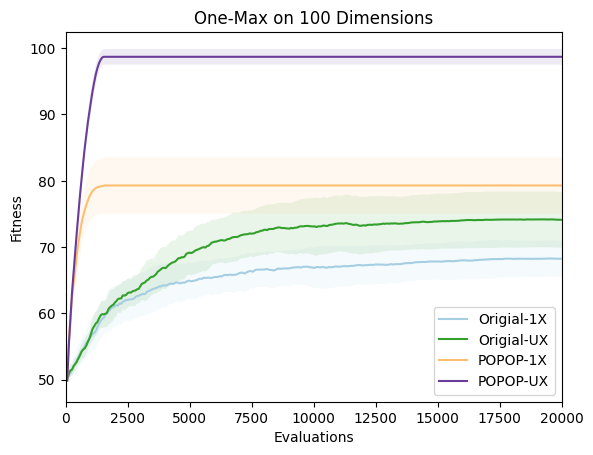

In [44]:
fits_origial_1x = np.array(fits_origial_1x)
avg_origial_1x = np.mean(fits_origial_1x, axis=0)
err_origial_1x = np.std(fits_origial_1x, axis=0)

fits_origial_ux = np.array(fits_origial_ux)
avg_origial_ux = np.mean(fits_origial_ux, axis=0)
err_origial_ux = np.std(fits_origial_ux, axis=0)

fits_popop_1x = np.array(fits_popop_1x)
avg_popop_1x = np.mean(fits_popop_1x, axis=0)
err_popop_1x = np.std(fits_popop_1x, axis=0)

fits_popop_ux = np.array(fits_popop_ux)
avg_popop_ux = np.mean(fits_popop_ux, axis=0)
err_popop_ux = np.std(fits_popop_ux, axis=0)

# Sử dụng colormap cho các giá trị màu khác nhau
colormap = plt.cm.get_cmap('Paired', 5)

plt.plot(evals, avg_origial_1x, label="Origial-1X", color=colormap(0))
plt.fill_between(evals, avg_origial_1x + err_origial_1x, avg_origial_1x - err_origial_1x, facecolor=colormap(0), alpha=0.1)

plt.plot(evals, avg_origial_ux, label="Origial-UX", color=colormap(1))
plt.fill_between(evals, avg_origial_ux + err_origial_ux, avg_origial_ux - err_origial_ux, facecolor=colormap(1), alpha=0.1)

plt.plot(evals, avg_popop_1x, label="POPOP-1X", color=colormap(2))
plt.fill_between(evals, avg_popop_1x + err_popop_1x, avg_popop_1x - err_popop_1x, facecolor=colormap(2), alpha=0.1)

plt.plot(evals, avg_popop_ux, label="POPOP-UX", color=colormap(3))
plt.fill_between(evals, avg_popop_ux + err_popop_ux, avg_popop_ux - err_popop_ux, facecolor=colormap(3), alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, 20000)
plt.title(f"One-Max on {num_parameters} Dimensions")
plt.legend();

## Nhận Xét: với bài toán OneMax 100 bit kích thướt quần thể 64
 - GA phiên bản POPOP với phép lai đồng nhất sẽ cho kết quả tốt nhất.
 - Phép lai đồng nhất cho kết quả vượt trội hơn cho với phép lai ghép 1 điểm trong cả 2 phiên bản GA phiên bản gốc và GA phiên bản POPOP.
 - GA phiên bản POPOP luôn cho kết quả hội tụ nhanh hơn GA phiên bản gốc.
 - Rất khó để tìm được cá thể tối ưu vì tương tự phép chọn lọc có thể bỏ qua các cá thể có 1 phần gen là tốt nhưng chưa thể hiện ra bên ngoài.
 - Kết quả của bài toán OneMax 100 bit kích thướt quần thể 64 tốt hơn 50 bit kích thướt 16 vì sự đa dạng quần thể được mở rộng.

# 3. Bài toán 10-bit Leading-Ones, Kích thướt quần thế (Population size): 16, số lần gọi hàm lượng giá tối đa (Max Evaluations): 50,000

In [45]:
num_parameters = 10
num_individuals = 16
max_evaluations = 50000

In [55]:
fits_origial_1x = []
fits_origial_ux = []
fits_popop_1x = []
fits_popop_ux = []
evals = []
for i in range(n_trials):
    pop_original_1x, pop_fitness_original_1x, mean_fitness_original_1x = genetic_algorithm_original(leading_ones, num_individuals, num_parameters, max_evaluations, selectionAlg= proportional_selection, crossAlg= onePointCrossover)
    pop_original_ux, pop_fitness_original_ux, mean_fitness_original_ux = genetic_algorithm_original(leading_ones, num_individuals, num_parameters, max_evaluations, selectionAlg= proportional_selection, crossAlg= uniformCrossover)
    pop_popop_1x, pop_fitness_popop_1x, mean_fitness_popop_1x = genetic_algorithm_POPOP(leading_ones, num_individuals, num_parameters, max_evaluations, selectionAlg= tournament_selection, crossAlg= onePointCrossover)
    pop_popop_ux, pop_fitness_popop_ux, mean_fitness_popop_ux = genetic_algorithm_POPOP(leading_ones, num_individuals, num_parameters, max_evaluations, selectionAlg= tournament_selection, crossAlg= uniformCrossover)

    mean_fitness_original_1x = np.array(mean_fitness_original_1x)
    mean_fitness_original_ux = np.array(mean_fitness_original_ux)
    mean_fitness_popop_1x = np.array(mean_fitness_popop_1x)
    mean_fitness_popop_ux = np.array(mean_fitness_popop_ux)
    if i == 0:
        evals = mean_fitness_original_1x[:,0]

    fits_origial_1x.append(mean_fitness_original_1x[:,1])
    fits_origial_ux.append(mean_fitness_original_ux[:,1])
    fits_popop_1x.append(mean_fitness_popop_1x[:,1])
    fits_popop_ux.append(mean_fitness_popop_ux[:,1])

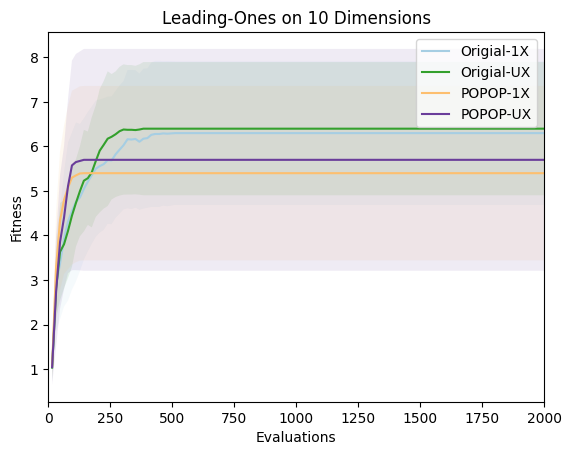

In [56]:
fits_origial_1x = np.array(fits_origial_1x)
avg_origial_1x = np.mean(fits_origial_1x, axis=0)
err_origial_1x = np.std(fits_origial_1x, axis=0)

fits_origial_ux = np.array(fits_origial_ux)
avg_origial_ux = np.mean(fits_origial_ux, axis=0)
err_origial_ux = np.std(fits_origial_ux, axis=0)

fits_popop_1x = np.array(fits_popop_1x)
avg_popop_1x = np.mean(fits_popop_1x, axis=0)
err_popop_1x = np.std(fits_popop_1x, axis=0)

fits_popop_ux = np.array(fits_popop_ux)
avg_popop_ux = np.mean(fits_popop_ux, axis=0)
err_popop_ux = np.std(fits_popop_ux, axis=0)

# Sử dụng colormap
colormap = plt.cm.get_cmap('Paired', 5)

plt.plot(evals, avg_origial_1x, label="Origial-1X", color=colormap(0))
plt.fill_between(evals, avg_origial_1x + err_origial_1x, avg_origial_1x - err_origial_1x, facecolor=colormap(0), alpha=0.1)

plt.plot(evals, avg_origial_ux, label="Origial-UX", color=colormap(1))
plt.fill_between(evals, avg_origial_ux + err_origial_ux, avg_origial_ux - err_origial_ux, facecolor=colormap(1), alpha=0.1)

plt.plot(evals, avg_popop_1x, label="POPOP-1X", color=colormap(2))
plt.fill_between(evals, avg_popop_1x + err_popop_1x, avg_popop_1x - err_popop_1x, facecolor=colormap(2), alpha=0.1)

plt.plot(evals, avg_popop_ux, label="POPOP-UX", color=colormap(3))
plt.fill_between(evals, avg_popop_ux + err_popop_ux, avg_popop_ux - err_popop_ux, facecolor=colormap(3), alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, 2000)
plt.title(f"Leading-Ones on {num_parameters} Dimensions")
plt.legend();

## Nhận Xét: với bài toán Leading-Ones 10 bit kích thướt quần thể 16
 - Kết quả hầu như không có sự khác biệt nào quá nhiều trong cả 2 phiên bản GA và 2 phép lai ghép khi số gen trong mỗi cá thể và kích thướt quần thể nhỏ.
 - Tuy nhiên GA phiên bản POPOP cho kết quả hội tụ nhanh hơn GA phiên bản gốc.

# 4. Bài toán 20-bit Leading-Ones, Kích thướt quần thế (Population size): 64, số lần gọi hàm lượng giá tối đa (Max Evaluations): 100,000

In [57]:
num_parameters = 20
num_individuals = 64
max_evaluations = 100000

In [66]:
fits_origial_1x = []
fits_origial_ux = []
fits_popop_1x = []
fits_popop_ux = []
evals = []
for i in range(n_trials):
    pop_original_1x, pop_fitness_original_1x, mean_fitness_original_1x = genetic_algorithm_original(leading_ones, num_individuals, num_parameters, max_evaluations, selectionAlg= proportional_selection, crossAlg= onePointCrossover)
    pop_original_ux, pop_fitness_original_ux, mean_fitness_original_ux = genetic_algorithm_original(leading_ones, num_individuals, num_parameters, max_evaluations, selectionAlg= proportional_selection, crossAlg= uniformCrossover)
    pop_popop_1x, pop_fitness_popop_1x, mean_fitness_popop_1x = genetic_algorithm_POPOP(leading_ones, num_individuals, num_parameters, max_evaluations, selectionAlg= tournament_selection, crossAlg= onePointCrossover)
    pop_popop_ux, pop_fitness_popop_ux, mean_fitness_popop_ux = genetic_algorithm_POPOP(leading_ones, num_individuals, num_parameters, max_evaluations, selectionAlg= tournament_selection, crossAlg= uniformCrossover)

    mean_fitness_original_1x = np.array(mean_fitness_original_1x)
    mean_fitness_original_ux = np.array(mean_fitness_original_ux)
    mean_fitness_popop_1x = np.array(mean_fitness_popop_1x)
    mean_fitness_popop_ux = np.array(mean_fitness_popop_ux)
    if i == 0:
        evals = mean_fitness_original_1x[:,0]

    fits_origial_1x.append(mean_fitness_original_1x[:,1])
    fits_origial_ux.append(mean_fitness_original_ux[:,1])
    fits_popop_1x.append(mean_fitness_popop_1x[:,1])
    fits_popop_ux.append(mean_fitness_popop_ux[:,1])

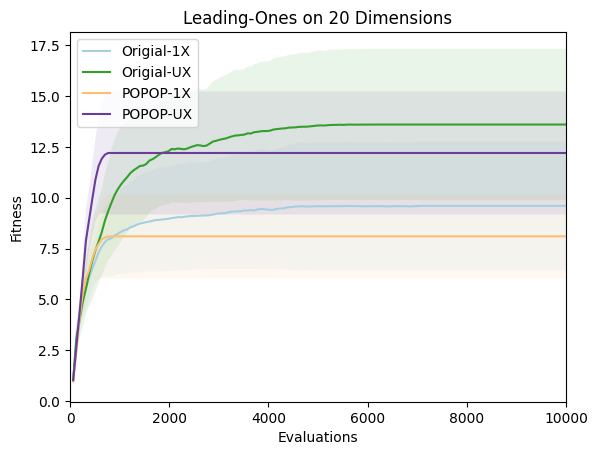

In [67]:
fits_origial_1x = np.array(fits_origial_1x)
avg_origial_1x = np.mean(fits_origial_1x, axis=0)
err_origial_1x = np.std(fits_origial_1x, axis=0)

fits_origial_ux = np.array(fits_origial_ux)
avg_origial_ux = np.mean(fits_origial_ux, axis=0)
err_origial_ux = np.std(fits_origial_ux, axis=0)

fits_popop_1x = np.array(fits_popop_1x)
avg_popop_1x = np.mean(fits_popop_1x, axis=0)
err_popop_1x = np.std(fits_popop_1x, axis=0)

fits_popop_ux = np.array(fits_popop_ux)
avg_popop_ux = np.mean(fits_popop_ux, axis=0)
err_popop_ux = np.std(fits_popop_ux, axis=0)

# Sử dụng colormap
colormap = plt.cm.get_cmap('Paired', 5)

plt.plot(evals, avg_origial_1x, label="Origial-1X", color=colormap(0))
plt.fill_between(evals, avg_origial_1x + err_origial_1x, avg_origial_1x - err_origial_1x, facecolor=colormap(0), alpha=0.1)

plt.plot(evals, avg_origial_ux, label="Origial-UX", color=colormap(1))
plt.fill_between(evals, avg_origial_ux + err_origial_ux, avg_origial_ux - err_origial_ux, facecolor=colormap(1), alpha=0.1)

plt.plot(evals, avg_popop_1x, label="POPOP-1X", color=colormap(2))
plt.fill_between(evals, avg_popop_1x + err_popop_1x, avg_popop_1x - err_popop_1x, facecolor=colormap(2), alpha=0.1)

plt.plot(evals, avg_popop_ux, label="POPOP-UX", color=colormap(3))
plt.fill_between(evals, avg_popop_ux + err_popop_ux, avg_popop_ux - err_popop_ux, facecolor=colormap(3), alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, 10000)
plt.title(f"Leading-Ones on {num_parameters} Dimensions")
plt.legend();

## Nhận xét: Với bài toán Leading-Ones 20 bit kích thướt quần thể 64
 - Kết quả GA với phép lai đồng nhất cho kết quả tốt hơn GA với phép lai 1 điểm trên cả 2 phiên bản.
 - Quá trình tiến hóa ban đầu thì kết quả trên GA phiên bản POPOP sẽ tốt hơn GA phiên bản gốc. Tuy nhiên nếu chạy đủ lâu thì GA phiên bản gốc sẽ cho ra kết quả tốt hơn GA phiên bản POPOP.
